<a href="https://colab.research.google.com/github/DAN-MASH/CovidProject/blob/main/classification_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
path = '/content/loan_prediction.csv'

In [26]:
data = pd.read_csv(path)

In [27]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
data.shape


(614, 13)

In [29]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


DATA CLEANING

In [30]:
#null value
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
data['Gender'] = data['Gender'].fillna(method='ffill')

In [32]:
data['Married'] = data['Married'].fillna(method='backfill')

In [33]:
data['Self_Employed'] = data['Self_Employed'].fillna(method='backfill')

In [34]:
data['Credit_History'] = data['Credit_History'].fillna(method='backfill')

In [35]:
data['Dependents'] = data['Dependents'].fillna(method='backfill')

In [36]:
mean = data['LoanAmount'].mean()
mean

146.41216216216216

In [37]:
mode1 = data['LoanAmount'].mode()
mode1

0    120.0
Name: LoanAmount, dtype: float64

In [38]:
data['LoanAmount'] = data['LoanAmount'].fillna(120)

In [39]:
# data['LoanAmount'].unique()

In [40]:
data['LoanAmount'].isnull().sum()

0

In [41]:
mode2=data['Loan_Amount_Term'].mode()[0]
mode2

360.0

In [42]:
# data['Gender'] = data['Gender'].fillna(method='backfill')

In [43]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(value = mode2)

In [44]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [45]:
# mode3=data['Loan_Amount_Term'].mode()[0]

In [46]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [48]:
# data2 = data.copy(deep = 'FALSE')

In [49]:
# data2.isnull().sum()

In [50]:
#Handling categorical variables
data['Dependents'] = data['Dependents'].replace("3+","4")

In [51]:
data['Dependents'].unique()

array(['0', '1', '2', '4'], dtype=object)

In [52]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


Feature Engineering

In [53]:
#One hot encoding
data['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [54]:
data['Gender'] = data['Gender'].map({'Male':1, 'Female':0}).astype('int')

In [55]:
data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [56]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [57]:
data['Education'] = data['Education'].map({'Graduate':0, 'Not Graduate':1}).astype('int')

In [58]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [59]:
data['Married'] = data['Married'].map({'Yes':1, 'No':0}).astype('int')

In [60]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [61]:
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1, 'No':0}).astype('int')

In [62]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [63]:
# data['Gender'] =data['Gender'].fillna(method='ffill')

In [64]:
# data['Property_Area'] =data['Property_Area'].fillna(method='ffill')

In [65]:
data['Property_Area'] = data['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2}).astype('int')

In [66]:
data['Loan_Status'] = data['Loan_Status'].map({'Y':0, 'N':1}).astype('int')

In [67]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,0,0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1,1
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,0


In [68]:
# @title Married

# from matplotlib import pyplot as plt
# data['Married'].plot(kind='hist', bins=20, title='Married')
# plt.gca().spines[['top', 'right',]].set_visible(False)

Creating the feature and targrt variable

In [69]:
X = data.drop(columns=['Loan_Status','Loan_ID'])
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,1
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,1
610,1,1,4,0,0,4106,0.0,40.0,180.0,1.0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,0
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,0


In [70]:
y = data['Loan_Status']
y

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: int64

In [71]:
col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
col

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [72]:
# X[col]

normalizing the data

In [73]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[col] = st.fit_transform(X[col])


In [74]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.072991,-0.554487,-0.302759,0.273231,1.0,0
1,1,1,1,0,0,-0.134412,-0.038732,-0.207648,0.273231,1.0,1
2,1,1,0,0,1,-0.393747,-0.554487,-0.944757,0.273231,1.0,0
3,1,1,0,1,0,-0.462062,0.251980,-0.302759,0.273231,1.0,0
4,1,0,0,0,0,0.097728,-0.554487,-0.053093,0.273231,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.410130,-0.554487,-0.885313,0.273231,1.0,1
610,1,1,4,0,0,-0.212557,-0.554487,-1.253868,-2.522836,1.0,1
611,1,1,1,0,0,0.437174,-0.472404,1.278459,0.273231,1.0,0
612,1,1,2,0,0,0.357064,-0.554487,0.493794,0.273231,1.0,0


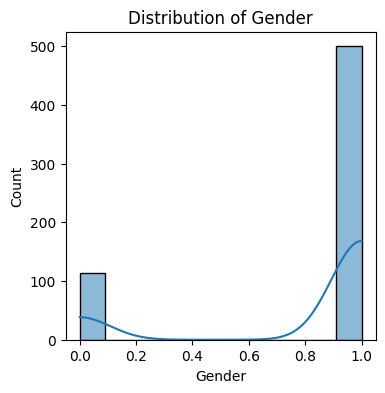

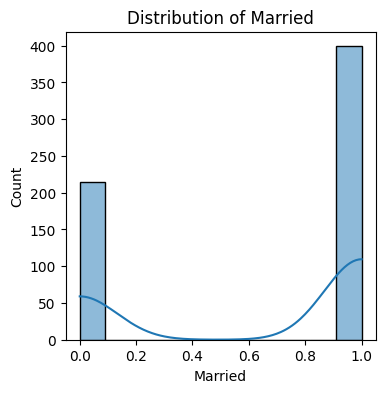

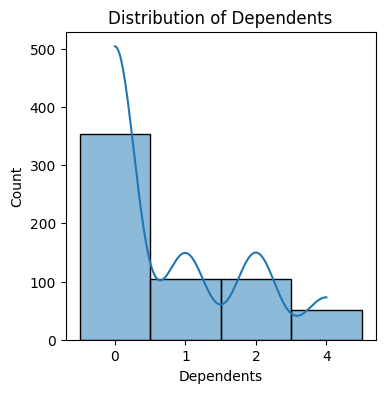

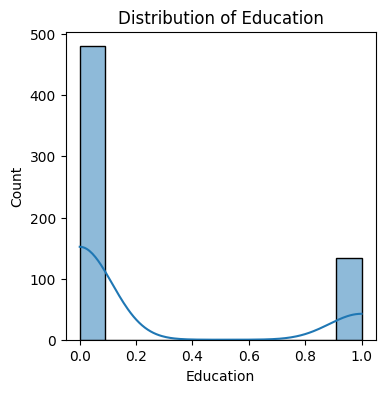

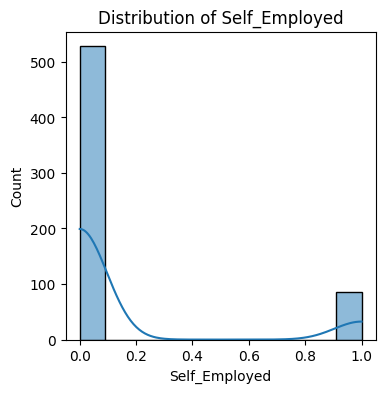

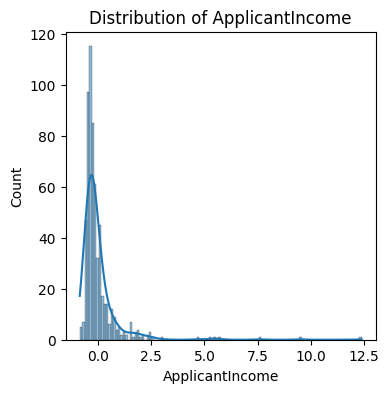

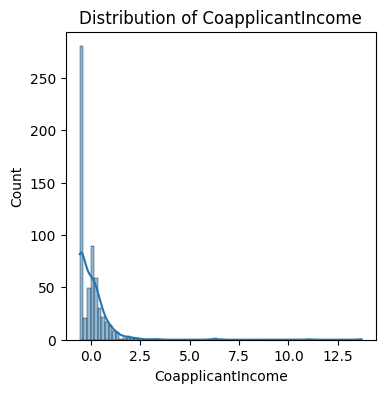

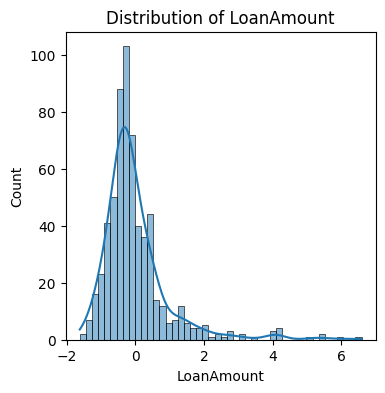

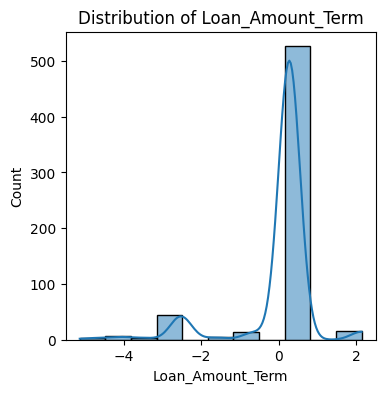

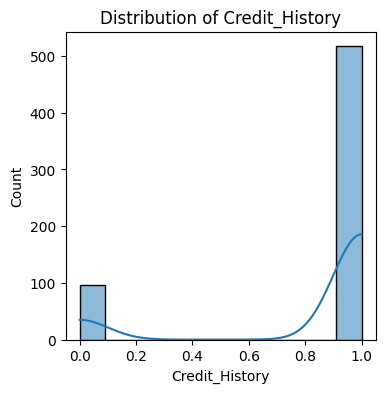

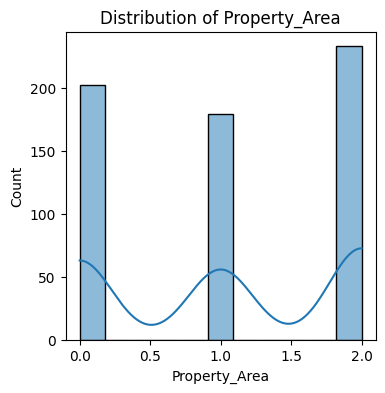

In [75]:
# prompt: Using dataframe X: check if the X is normally distributed by generating histrogram for each column

for column in X.columns:
  plt.figure(figsize=(4, 4))
  plt.title(f"Distribution of {column}")
  sns.histplot(X[column], kde=True)
  plt.show()


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [99]:
def ml_model(model,X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 42)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  Accuracy = accuracy_score(y_pred,y_test)
  print(f'The accuracy score is {Accuracy}')

In [100]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
ml_model(lr,X,y)

The accuracy score is 0.7881773399014779


CREATING AN APPROPRIATE MACHINE LEARNING MODEL

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Automating the task

In [77]:
def model_sel(model,X,y):
  X_train ,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state = 40)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(f"Accuracy score is  {accuracy.round(4)}")




In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_sel(lr,X,y)

Accuracy score is  0.8387


In [79]:
# @title Dependents vs Gender

# from matplotlib import pyplot as plt
# import seaborn as sns
# figsize = (12, 1.2 * len(X['Dependents'].unique()))
# plt.figure(figsize=figsize)
# sns.violinplot(X, x='Gender', y='Dependents', inner='box', palette='Dark2')
# sns.despine(top=True, right=True, bottom=True, left=True)

Check if the data is normally distributed


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [81]:
# prompt: split the data to test and train and create a machine learning model fit for predicting the target variable y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


In [82]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_sel(model,X,y)

Accuracy score is  0.8065


In [83]:
# # prompt: Model Deployment:**  - Deploy the trained model into a production environment where it can be used to make loan decisions. - Develop a user interface or API to allow users to input their loan details and receive a loan decision.

# # Model Deployment:
# # 1. Save the trained model:
# import pickle

# # Save the trained model to a file
# with open('loan_model.pkl', 'wb') as f:
#     pickle.dump(lr, f)

# # 2. Develop a user interface or API:
# # Create a web application or API that allows users to input their loan details and receive a loan decision.
# # The application should collect the user's income, co-applicant income, loan amount, loan term, and other relevant information.
# # The application should then call the saved model to predict the loan status and display the result to the user.

# # Example using Flask:
# from flask import Flask, request, render_template

# app = Flask(__name__)

# @app.route('/')
# def home():
#     return render_template('index.html')

# @app.route('/predict', methods=['POST'])
# def predict():
#     # Get user input from the form
#     income = float(request.form['income'])
#     co_income = float(request.form['co_income'])
#     loan_amount = float(request.form['loan_amount'])
#     loan_term = float(request.form['loan_term'])
#     gender = int(request.form['gender'])
#     married = int(request.form['married'])
#     dependents = int(request.form['dependents'])
#     education = int(request.form['education'])
#     self_employed = int(request.form['self_employed'])
#     property_area = int(request.form['property_area'])

#     # Create the input vector
#     input_vector = [income, co_income, loan_amount, loan_term, gender, married, dependents, education, self_employed, property_area]

#     # Load the saved model
#     with open('loan_model.pkl', 'rb') as f:
#         model = pickle.load(f)

#     # Predict the loan status
#     prediction = model.predict([input_vector])

#     # Display the result to the user
#     if prediction[0] == 0:
#         result = 'Loan Approved'
#     else:
#         result = 'Loan Denied'

#     return render_template('result.html', result=result)

# if __name__ == '__main__':
#     app.run()


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [85]:
def model_val(model,X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state = 42)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  #Accuracy score
  score = accuracy_score(y_test,y_pred)
  print(f"Accuracy score is {score}")

In [86]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

Accuracy score is 0.7967479674796748


In [87]:
model.predict([[0,0,1,0,0,0.072991,-0.554487,-0.302759,0.273231,1.0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [88]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model_val(model1,X,y)

Accuracy score is 0.7886178861788617


In [89]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.072991,-0.554487,-0.302759,0.273231,1.0,0
1,1,1,1,0,0,-0.134412,-0.038732,-0.207648,0.273231,1.0,1
2,1,1,0,0,1,-0.393747,-0.554487,-0.944757,0.273231,1.0,0
3,1,1,0,1,0,-0.462062,0.251980,-0.302759,0.273231,1.0,0
4,1,0,0,0,0,0.097728,-0.554487,-0.053093,0.273231,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.410130,-0.554487,-0.885313,0.273231,1.0,1
610,1,1,4,0,0,-0.212557,-0.554487,-1.253868,-2.522836,1.0,1
611,1,1,1,0,0,0.437174,-0.472404,1.278459,0.273231,1.0,0
612,1,1,2,0,0,0.357064,-0.554487,0.493794,0.273231,1.0,0


In [90]:
model.predict([[1,0,4,0,0,0.072991,-0.554487,-0.302759,0.273231,1.0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])